In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [5]:
#Read the data
data=pd.read_csv("/content/Cars.csv")
data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [48]:
data.shape

(81, 5)

In [49]:
data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [50]:
data.tail()

,HP,MPG,VOL,SP,WT
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


In [ ]:
#Scatter matrix,corrlation matrix
#pairplot,pd.plotting.scatter_matrix

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [52]:
data.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [53]:
#Scatter matrix
data.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [54]:
data.isnull().sum() #Check for missing value or data.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

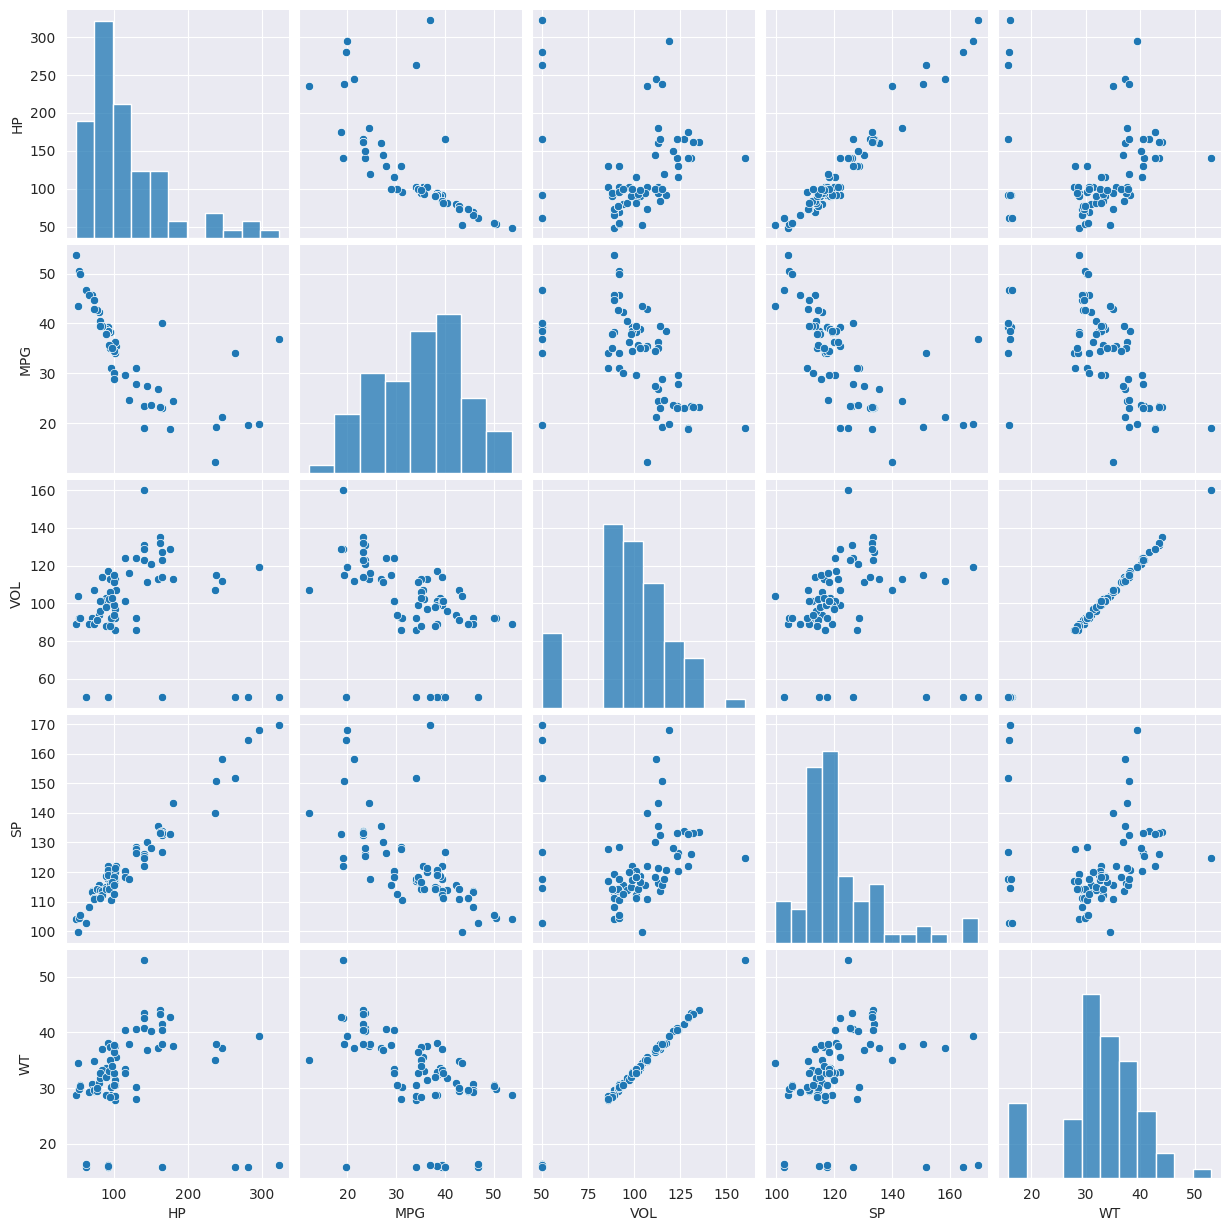

In [55]:
#Scatterplot between variables along with histo:
#Check for assumption:Indep variables are indep with each other
sns.set_style(style="darkgrid")
sns.pairplot(data)

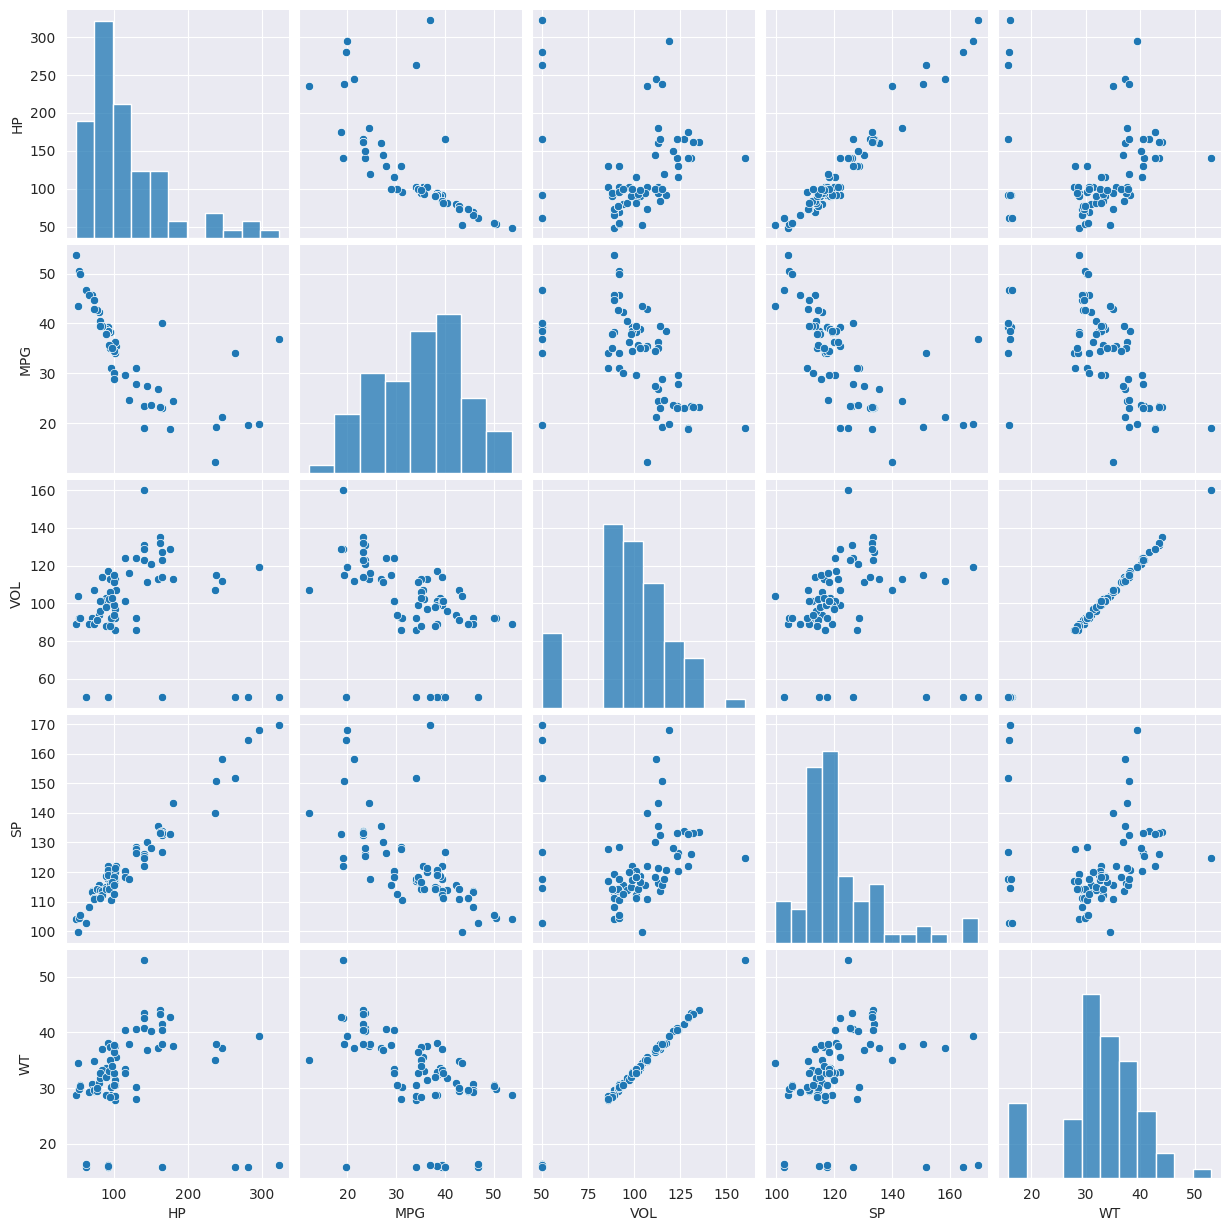

In [56]:
sns.pairplot(data)

In [6]:
#Preparing/Build model:
model=smf.ols("MPG~WT+VOL+SP+HP",data=data).fit() #excess variables can be joined using + symbol
model

In [7]:
#coefficients of beta values:
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [9]:
# t & p-values:print(model.tvalues,model.pvalues)
print("*** t-values ***","\n",model.tvalues,"*** p-values ***",model.pvalues) #p values of SP and HP only are significant.VOL & WT not significant means both have same kind of info
#print(model.tvalues,"\n",model.pvalues)

*** t-values *** 
 Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 *** p-values *** Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [10]:
##R squared value tells us how good model is.
(model.rsquared,model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

# Simple Linear Regression Model

In [11]:
##SLR
ml_v=smf.ols('MPG~VOL',data = data).fit()  #Simple Linear Regression model for MPG Vs VOL alone
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)
# here p-value 3.822 is approx. = 0, and less than alpha so VOL variable is significant
'''ml_v=smf.ols("MPG~VOL",data=data).fit()
ml_v'''

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


'ml_v=smf.ols("MPG~VOL",data=data).fit()\nml_v'

In [62]:
#print(ml_v.tvalues,"\n",ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [15]:
ml_w=smf.ols('MPG~WT',data = data).fit()#Simple Linear Regression model for MPG Vs WT alone
print(ml_w.tvalues, '\n', ml_w.pvalues)  # here also p value is less than alpha so WT variable is significant

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [16]:
ml_wv=smf.ols('MPG~WT+VOL',data = data).fit()  # Linear Regression model for MPG Vs VOL+WT i.e. combine both
print(ml_wv.tvalues, '\n', ml_wv.pvalues) # p-values are greather than alpha so combination of both is not significant. This is problem of multicollinearity

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


# Calculating VIF

Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


In [17]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=data).fit().rsquared # build regression model considering HP as y variable
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=data).fit().rsquared # build regression model considering WT as y variable
vif_wt = 1/(1-rsq_wt)

rsq_vol = smf.ols('VOL~WT+SP+HP',data=data).fit().rsquared # build regression model considering VOL as y variable
vif_vol = 1/(1-rsq_vol)

rsq_sp = smf.ols('SP~WT+VOL+HP',data=data).fit().rsquared  # build regression model considering SP as y variable
vif_sp = 1/(1-rsq_sp)

# Storing vif values in a data frame
d1 = {'Variables':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


# Subset Slection

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
#Calculating VIF
'''rsq_hp=smf.ols("HP~WT+VOL+SP",data=data).fit().rsquared
rsq_hp
vif_hp=1/(1-rsq_hp)
vif_hp'''
#Build model with Wt
import statsmodels.formula.api as smf
model = smf.ols('MPG~WT+SP+HP',data=data).fit()
#f'AIC:{model.aic}, rsq_wt:{rsq_wt}'
print(model.rsquared,model.aic) # feature which gives you high r squared value and less AIC value should be kept


0.7694828139983458 476.29927501529767


In [20]:
#Build model with VOL
import statsmodels.formula.api as smf
model = smf.ols('MPG~VOL+SP+HP',data=data).fit()
#f'AIC:{model.aic}, rsq_wt:{rsq_vol}'
print(model.rsquared,model.aic)

0.770368341321302 475.9875158854609


# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

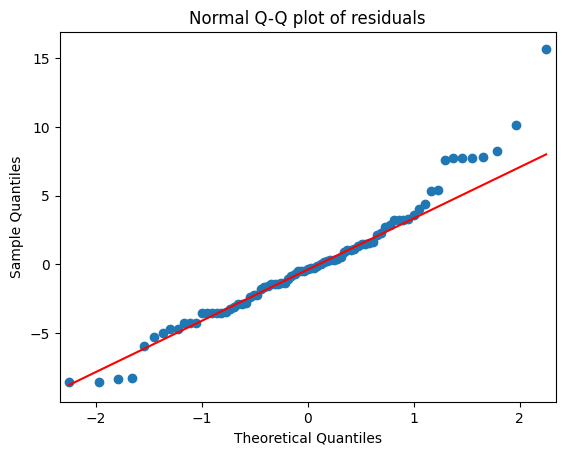

In [21]:
import statsmodels.api as sm
model = smf.ols('MPG~VOL+SP+HP',data=data).fit() #model.resid is error
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals") # points that are away from line are outliers
plt.show() # Here some values are more than 10 y value

In [22]:
# to print index of values whose y value is more than 10
list(np.where(model.resid>10))

[array([ 0, 76])]

# Residual Plot for Homoscedasticity: Constant Variance

In [ ]:
#model = smf.ols('MPG~VOL+SP+WT+HP',data=cars).fit()

In [23]:
# Function definition for standardization i.e. z score, Function name: get_standardized_values
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std() # This is z score = (Xi - mean)/std. dev.

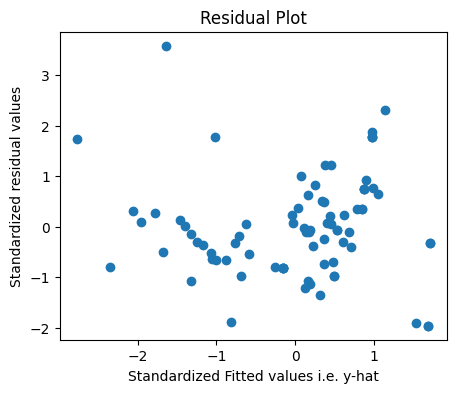

In [25]:
plt.figure(figsize=(5,4))
plt.scatter(get_standardized_values(model.fittedvalues), # fittedvalue is y hat.,model.resid is error
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values i.e. y-hat')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

eval_env: 1


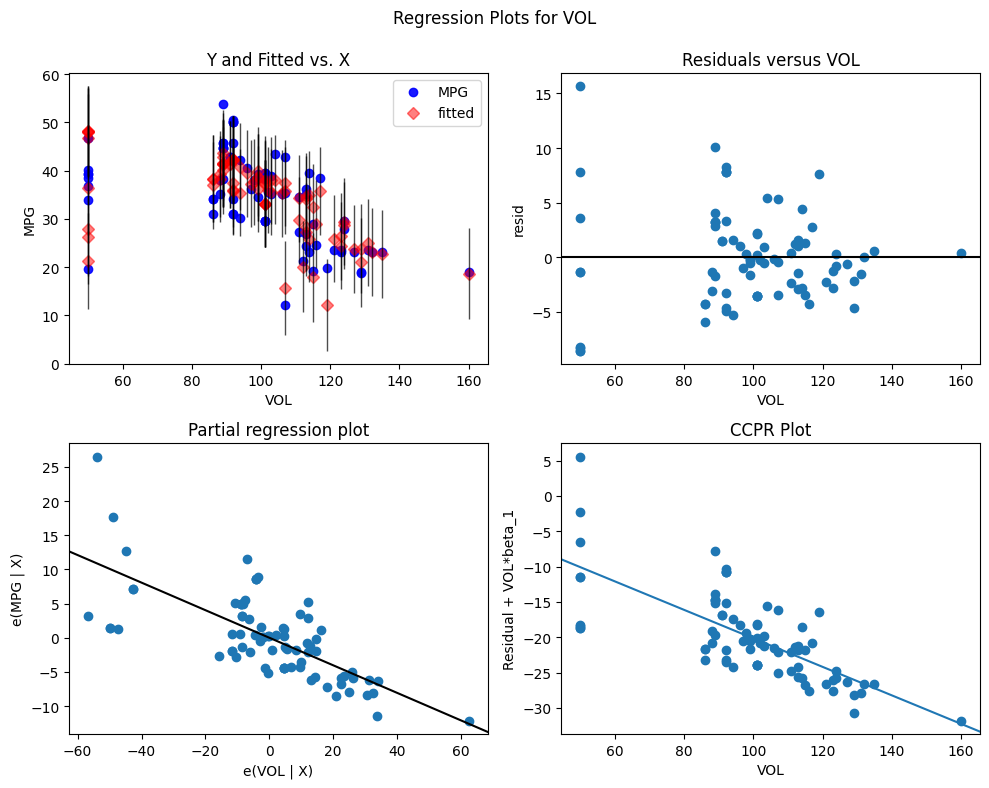

In [28]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(model, "VOL", fig=fig)
plt.show()

638.8060836592878

eval_env: 1


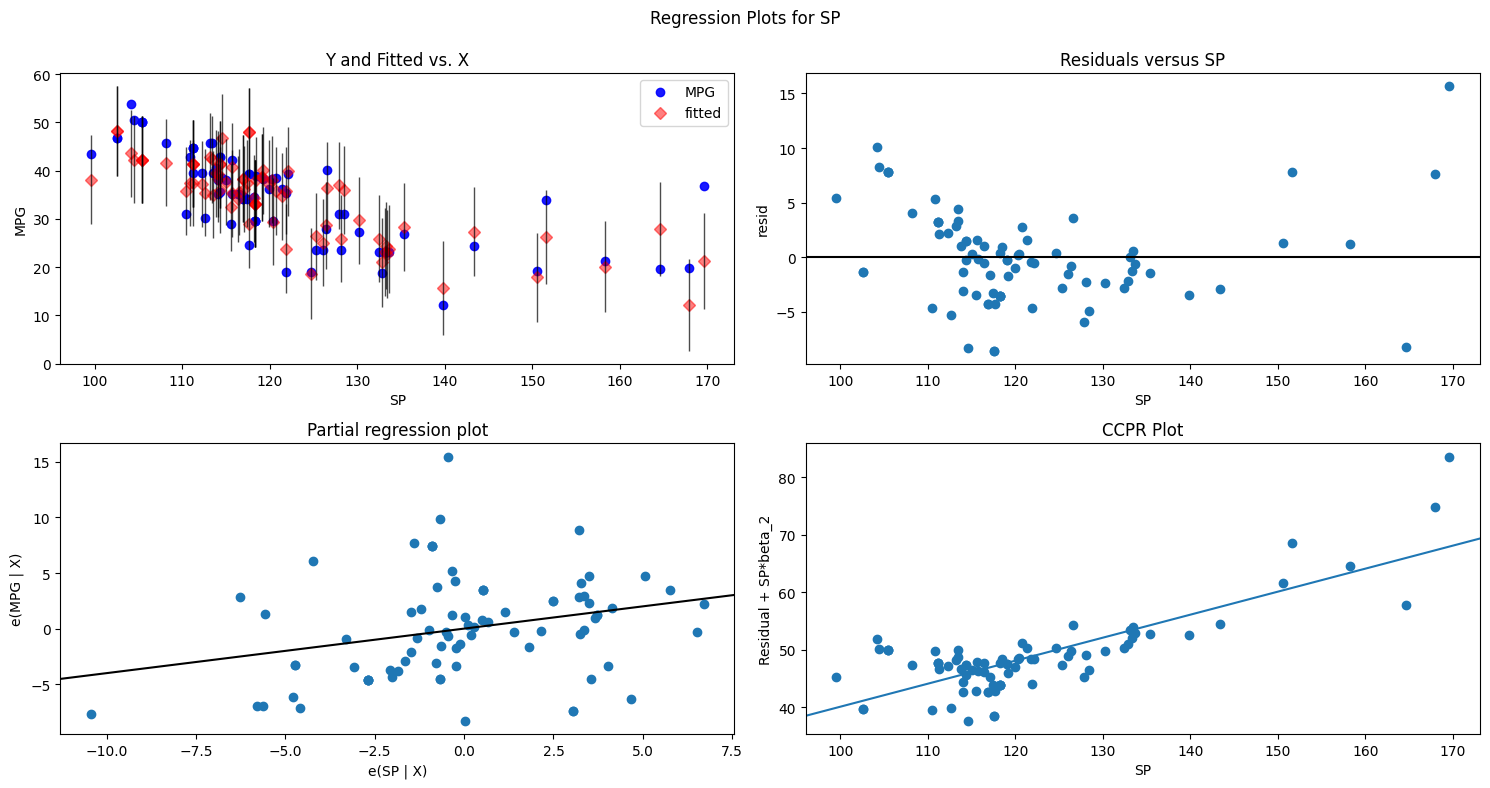

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "SP", fig=fig)
plt.show()

eval_env: 1


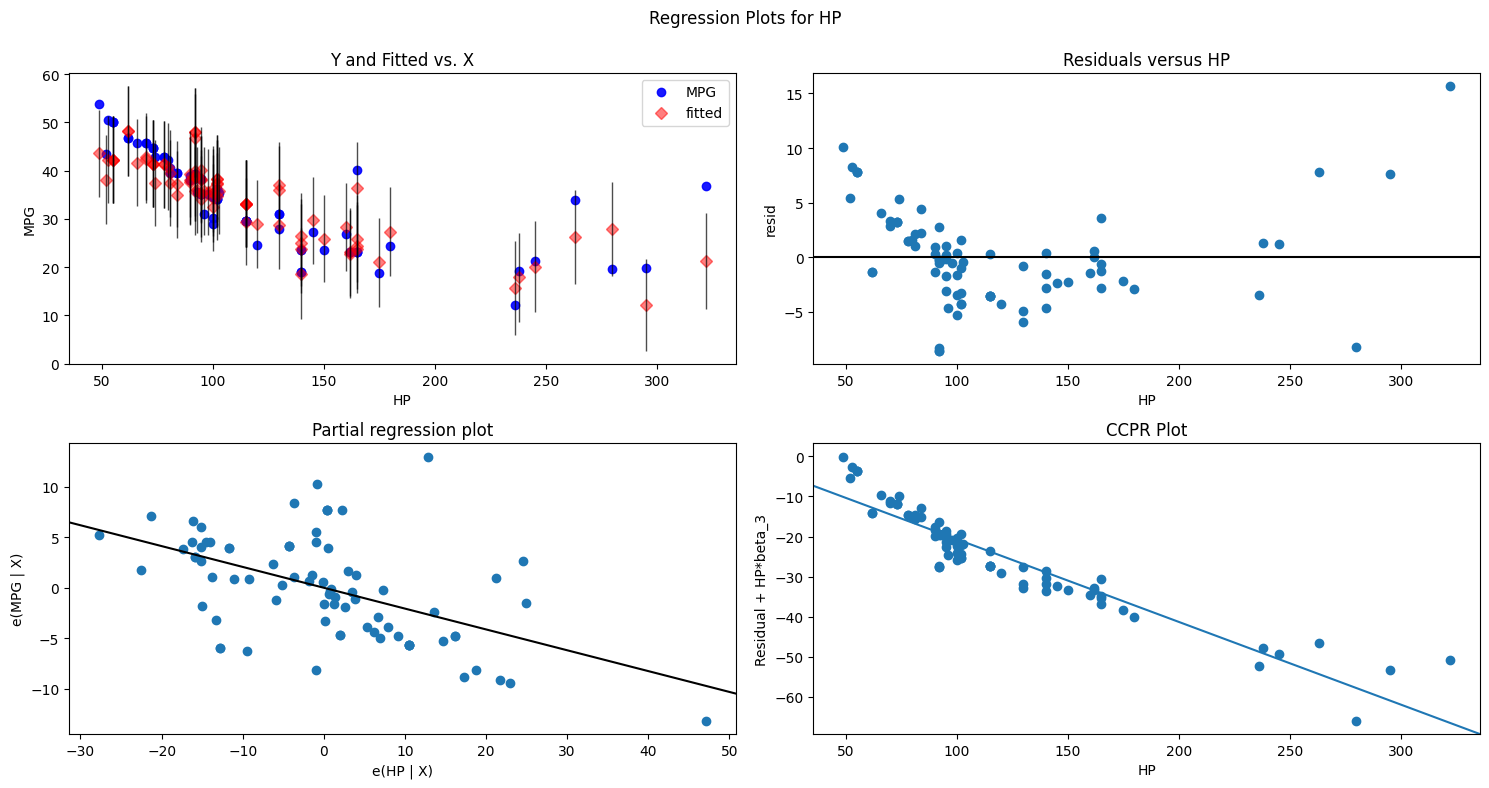

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Model Deletion Diagnostics

# Cook’s Distance

In [31]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence() # this method will return 2 values: cook's distance and p-value.
(c, _) = model_influence.cooks_distance # we don't need p-value so we placed _ here. That is temporary place holder.

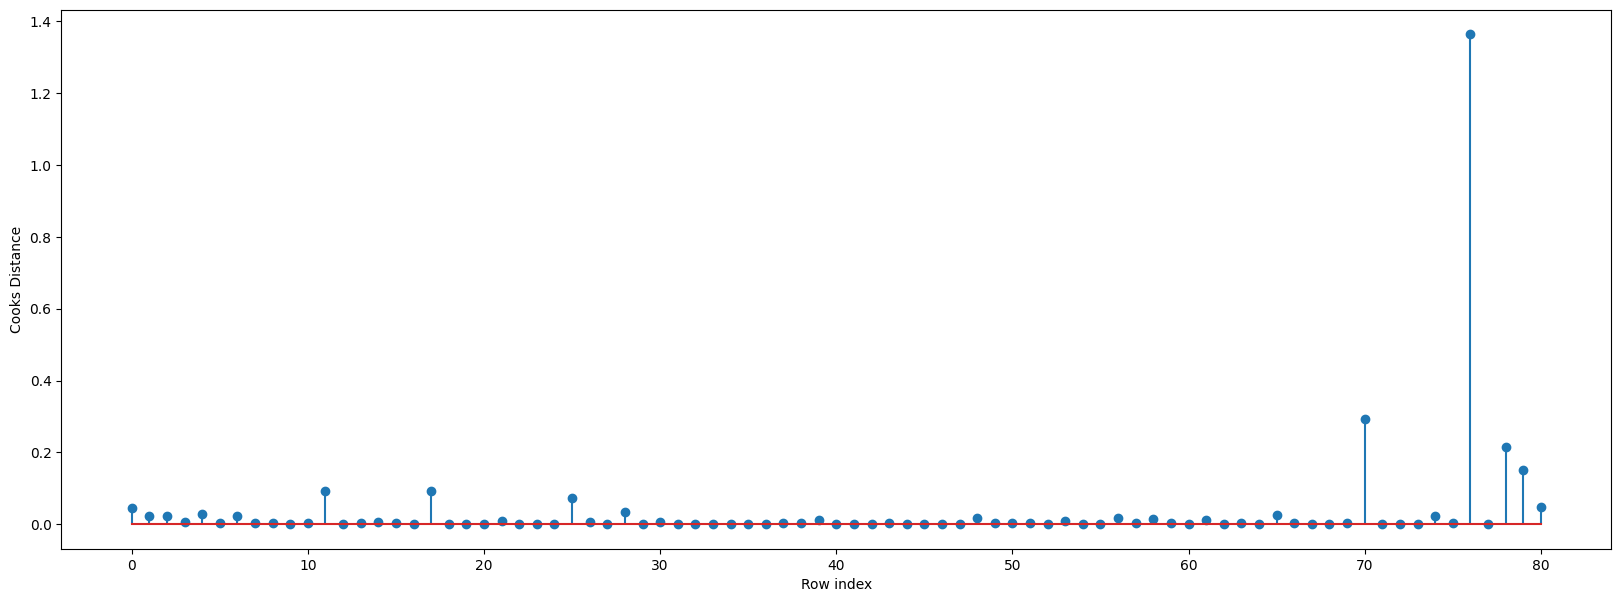

In [33]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3)) # index values of car on x-axis
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
#index and value of influencer where c is more than .
#The Cook's distance is considered high if it is greater than 0.5 and extreme if it is greater than 1.
(np.argmax(c),np.max(c)) # argmax() gives index value of max value in dataset
# 1.3641743869103298 is cook's distance for index 76

(76, 1.364174386910332)

# High Influence points

In [36]:
data.shape

(81, 5)

In [39]:
data.shape[1]

5

In [40]:
k = data.shape[1] #k is no of variables as 5
n = data.shape[0] # no of data points as 81
leverage_cutoff = 3*((k + 1))/n
leverage_cutoff

0.2222222222222222

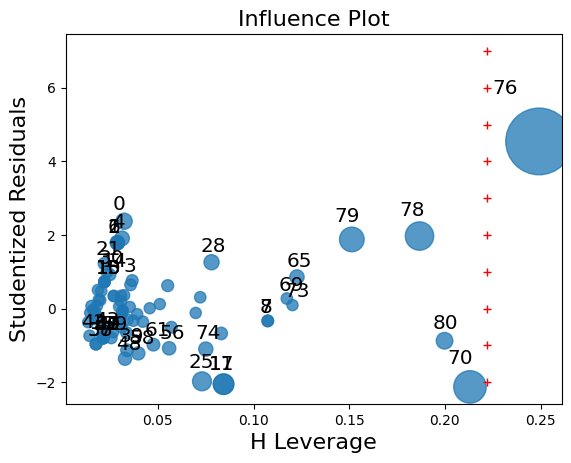

In [41]:

from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alpha=0.5)

y=[i for i in range(-2,8)]# -2 to 8: 10 values for printing + in red color
x=[leverage_cutoff for i in range(10)] # 10 values for printing + in red color
plt.plot(x,y,'r+')

plt.show()

In [42]:
data[data.index.isin([70, 76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [43]:
#See the differences in HP and other variable values
data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Improving the mode

In [44]:
#Load the data
cars_new = pd.read_csv("/content/Cars.csv")
cars_new


,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [48]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1=cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()
car1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [49]:
#Drop the original index
car1=car1.drop(['index'],axis=1)
car1


,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


# Build Model

In [50]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car1).fit()
final_ml_V

In [51]:
final_ml_V.rsquared,final_ml_V.aic # comparativey little high r squared value and little low aic value for Volume than WT, So discard WT

(0.8161692010376008, 446.1172263944772)

In [52]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_W= smf.ols('MPG~WT+SP+HP',data = car1).fit()
final_ml_W

In [53]:
final_ml_W.rsquared,final_ml_W.aic

(0.8160034320495303, 446.1884323575032)

##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved and **discard 'WT'**.

In [54]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance
# find again if any data point has high influence or outlier

Text(0, 0.5, "Cook's Distance")

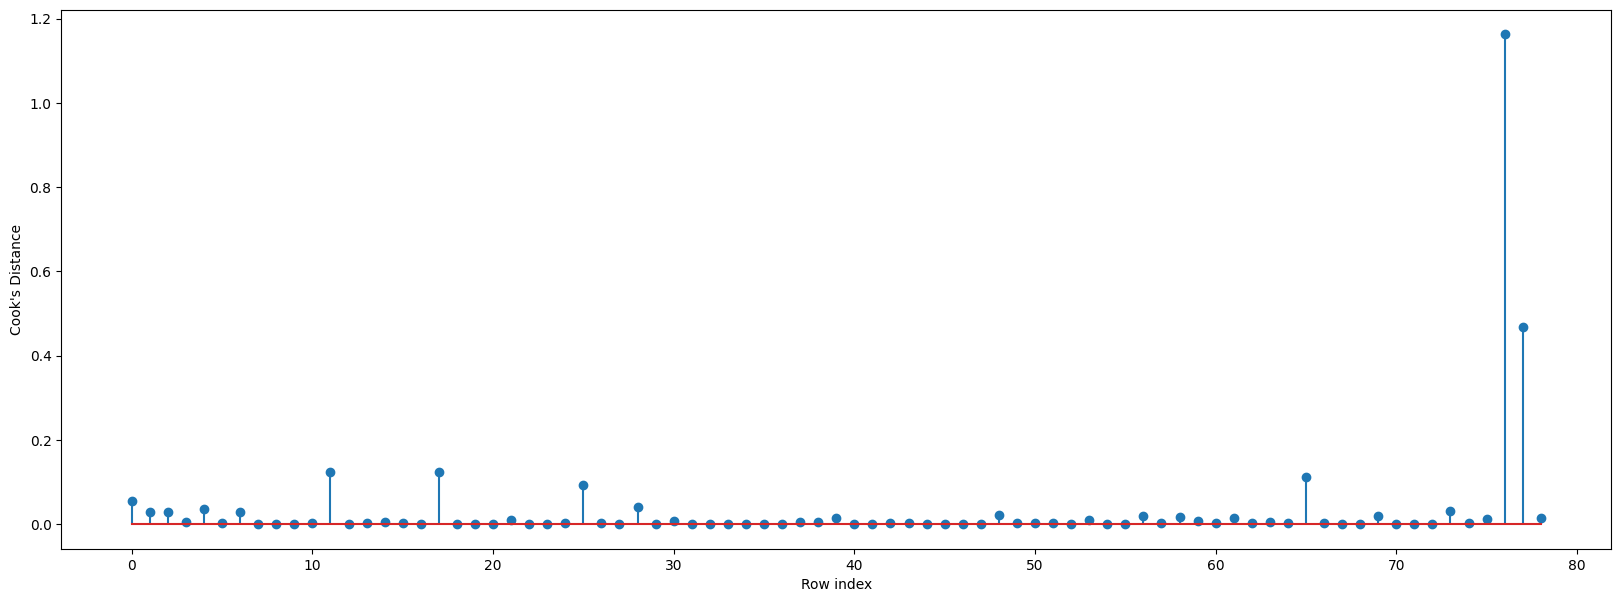

In [55]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3))
plt.xlabel('Row index')
plt.ylabel('Cook\'s Distance')

In [56]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(76, 1.1629387469135182)

In [58]:
#Drop 76 and 77 (to be on safer side) observations
car2=car1.drop(car1.index[[76,77]],axis=0)
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [59]:
#Reset the index and re arrange the row values
car3=car2.reset_index()
car3

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
72,72,140,19.086341,160,124.715241,52.997752
73,73,140,19.086341,129,121.864163,42.618698
74,74,175,18.762837,129,132.864163,42.778219
75,75,238,19.197888,115,150.576579,37.923113


In [60]:
car4=car3.drop(['index'],axis=1)
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [61]:
#Build the model on the new data
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()
final_ml_V


In [63]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance
(c_V, _)


(array([6.67624758e-02, 3.14966307e-02, 3.14966307e-02, 4.41723601e-03,
        3.97043587e-02, 3.18490107e-03, 3.14966307e-02, 2.72885950e-05,
        2.72885950e-05, 4.23158478e-04, 3.36657172e-03, 1.11242286e-01,
        2.48821721e-03, 3.36657172e-03, 6.02019366e-03, 3.36657172e-03,
        4.76170508e-04, 1.11242286e-01, 4.76170508e-04, 8.82063701e-08,
        4.85657000e-04, 9.04771072e-03, 1.03596157e-04, 2.90455670e-05,
        1.62817845e-03, 8.44546582e-02, 1.41130179e-03, 4.85657000e-04,
        2.35932141e-02, 7.74080941e-04, 5.13295810e-03, 8.85600593e-04,
        3.71445242e-04, 3.34592443e-04, 6.55775719e-04, 6.50001470e-06,
        5.18707563e-04, 5.17386941e-03, 5.17386941e-03, 1.14762595e-02,
        1.77539300e-05, 2.94570648e-04, 2.60372905e-03, 3.42589309e-03,
        2.95070478e-04, 8.57428219e-04, 1.22100386e-04, 2.68649147e-04,
        1.72755037e-02, 4.28555597e-03, 4.28555597e-03, 4.28555597e-03,
        3.62914824e-04, 7.40875771e-05, 2.07146665e-04, 9.398764

Text(0, 0.5, "Cook's Distance")

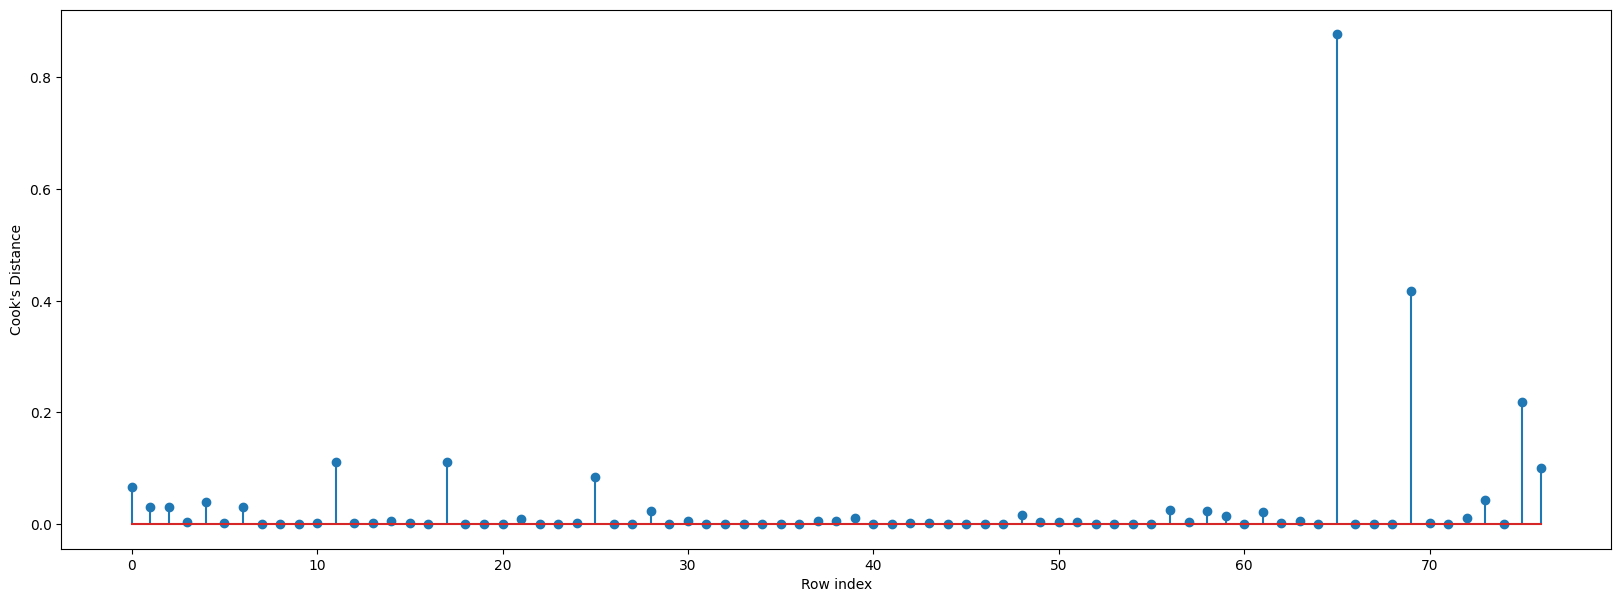

In [64]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3))
plt.xlabel('Row index')
plt.ylabel('Cook\'s Distance') # Here 0.9 did not cross 1 so no need to remove it

In [65]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(65, 0.8774556986296674)

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [66]:
#Check the accuracy of the mode
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()
final_ml_V


In [67]:
(final_ml_V.rsquared,final_ml_V.aic) # compare with 1st model values. It was 0.77053 now it is 0.86696

(0.8669636111859063, 409.4153062719508)

## Predicting for new data

In [68]:
#New data for prediction - what will be MPG for follow. values?
new_data=pd.DataFrame({'HP':40,"VOL":95,"SP":102},index=["index 1"]) #"WT":35
new_data


,HP,VOL,SP
index 1,40,95,102


In [69]:
final_ml_V.predict(new_data)

index 1    46.035594
dtype: float64